# 02 - Baseline Model
Bu notebook, veri seti üzerinde ilk çalışan makine öğrenimi modelini (baseline) oluşturacak ve
Feature engineering yapmadan önce modelin temel performansını görmek amacı ile tahminlenecektir.


In [18]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../data/raw/cancer-patient-data-sets.csv')

df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [7]:
# Kullanmayacağımız sütunları silelim.

df = df.drop(['index', 'Patient Id'], axis=1)

In [8]:
print(df.shape)
df.head()

(1000, 24)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [10]:
# Feature matrixini oluşturalım.


X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
    'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
    'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
    'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
    'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
    'Dry Cough', 'Snoring',]].values

X[:5]

array([[33,  1,  2,  4,  5,  4,  3,  2,  2,  4,  3,  2,  2,  4,  3,  4,
         2,  2,  3,  1,  2,  3,  4],
       [17,  1,  3,  1,  5,  3,  4,  2,  2,  2,  2,  4,  2,  3,  1,  3,
         7,  8,  6,  2,  1,  7,  2],
       [35,  1,  4,  5,  6,  5,  5,  4,  6,  7,  2,  3,  4,  8,  8,  7,
         9,  2,  1,  4,  6,  7,  2],
       [37,  1,  7,  7,  7,  7,  6,  7,  7,  7,  7,  7,  7,  8,  4,  2,
         3,  1,  4,  5,  6,  7,  5],
       [46,  1,  6,  8,  7,  7,  7,  6,  7,  7,  8,  7,  7,  9,  3,  2,
         4,  1,  4,  2,  4,  2,  3]])

In [14]:
# Target değişkeni encode edelim
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])  

# Low=1, Medium=2, High=0 şeklinde çıkar (sonra mapping yaparız)

In [15]:
#  Target matrixini oluşturalım.

y=df['Level']

y[:5]

0    1
1    2
2    0
3    0
4    0
Name: Level, dtype: int64

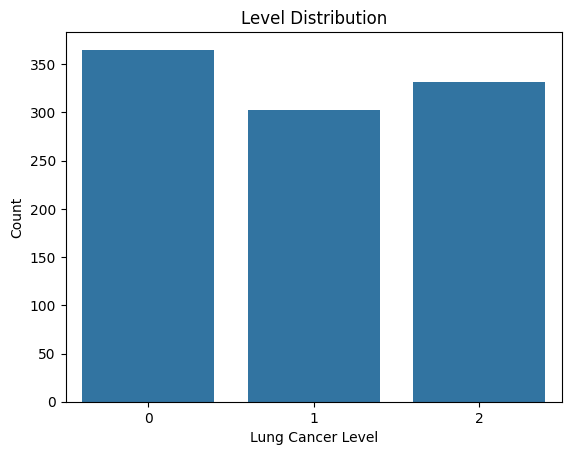

In [ ]:
# Target değişkeni için seviyeleri gösteren bir grafik çıkardık.


sns.countplot(
    data=df,
    x='Level'
)

plt.title('Level Distribution')
plt.xlabel('Lung Cancer Level')
plt.ylabel('Count')
plt.show()

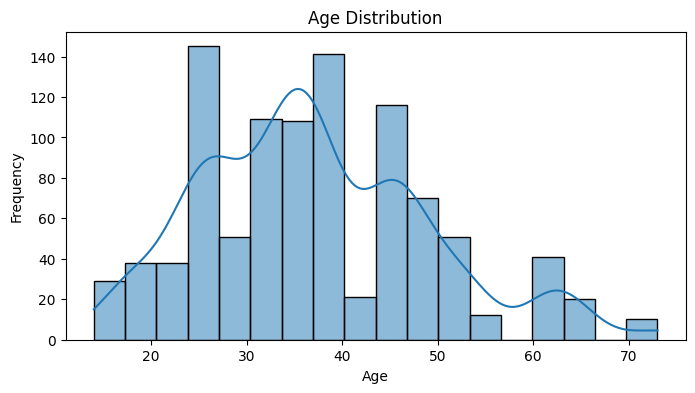